# Comparing multiclass LightGBM classifiers for imbalanced darasets

## Imports, utilities

In [1]:
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score,accuracy_score,confusion_matrix
from LightgbmFocalLoss import *

### Plotting confusion matrix

In [2]:
import itertools
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [13]:
X, y = make_classification(n_classes=3,
                           n_samples=2000,
                           n_features=4,
                           n_informative=3,
                           n_redundant=1,
                           weights=[.03, .02, .95],
                           random_state=42)

le = preprocessing.LabelEncoder()  #
y_label = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y_label, test_size=0.30, random_state=42)

## Multiclass lightgbm 

In [14]:
clf = lgb.LGBMClassifier()
clf.fit(X_train, y_train, early_stopping_rounds=20, eval_set=[(X_test, y_test)], verbose=0)

LGBMClassifier()

In [15]:
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, average='macro')
print('accuracy core', acc_score,' recall score ', rec_score)

accuracy core 0.9783333333333334  recall score  0.7650445873356091


Normalized confusion matrix
[[0.52941176 0.11764706 0.35294118]
 [0.         0.76923077 0.23076923]
 [0.         0.00350877 0.99649123]]


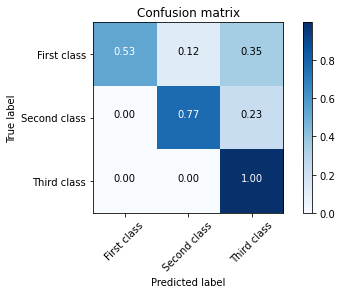

In [16]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1, 2])
plot_confusion_matrix(cnf_matrix, classes=['First class','Second class', 'Third class'],normalize=True,  title='Confusion matrix')

## Multiclass lightgbm with focal loss

In [17]:
model_params = {"alpha_focal_loss": 0.75,
                "gamma_focal_loss": 2.0}

clf = MultiClassLightgbmWithFocalLoss(n_jobs=3, **model_params)
fit_params = {'eval_set': (X_test, y_test)}
clf.fit(X_train, y_train, **fit_params)

[LightGBM] [Warning] Unknown parameter: alpha_focal_loss
[LightGBM] [Warning] Unknown parameter: gamma_focal_loss


MultiClassLightgbmWithFocalLoss()

In [18]:
y_pred = clf.predict(X_test)
acc_score = accuracy_score(y_test, y_pred)
rec_score = recall_score(y_test, y_pred, average='macro')
print('accuracy core', acc_score,' recall score ', rec_score)

accuracy core 0.98  recall score  0.8226985261040989


Normalized confusion matrix
[[0.70588235 0.11764706 0.17647059]
 [0.         0.76923077 0.23076923]
 [0.00350877 0.00350877 0.99298246]]


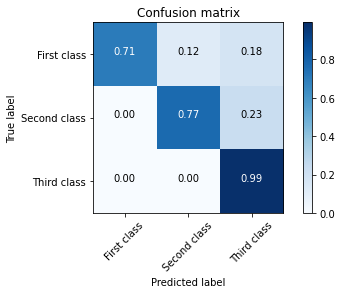

In [19]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1, 2])
plot_confusion_matrix(cnf_matrix, classes=['First class','Second class', 'Third class'],normalize=True,  title='Confusion matrix')